In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import  make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
data = pd.read_csv('migraine_data.csv')

In [3]:
data

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [4]:
data.shape

(400, 24)

In [5]:
data.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [7]:
data.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [8]:
data.duplicated().sum()

6

#  Missing Values - 0
#  Duplicated Rows - 6

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(394, 24)

In [11]:
data.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,...,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.0,394.000000,394.000000,394.000000
mean,31.695431,1.619289,2.365482,0.972081,0.977157,2.472081,0.987310,0.324873,0.977157,0.979695,...,0.002538,0.126904,0.060914,0.015228,0.005076,0.015228,0.0,0.017766,0.007614,0.408629
std,12.182607,0.773106,1.672537,0.270203,0.279924,0.771953,0.112077,0.468923,0.149592,0.141219,...,0.050379,0.333288,0.239476,0.122616,0.071156,0.122616,0.0,0.132270,0.087037,0.492206
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,3.750000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


 # Exploratory Data Analysis (EDA)

# Univariate Analysis

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          394 non-null    int64 
 1   Duration     394 non-null    int64 
 2   Frequency    394 non-null    int64 
 3   Location     394 non-null    int64 
 4   Character    394 non-null    int64 
 5   Intensity    394 non-null    int64 
 6   Nausea       394 non-null    int64 
 7   Vomit        394 non-null    int64 
 8   Phonophobia  394 non-null    int64 
 9   Photophobia  394 non-null    int64 
 10  Visual       394 non-null    int64 
 11  Sensory      394 non-null    int64 
 12  Dysphasia    394 non-null    int64 
 13  Dysarthria   394 non-null    int64 
 14  Vertigo      394 non-null    int64 
 15  Tinnitus     394 non-null    int64 
 16  Hypoacusis   394 non-null    int64 
 17  Diplopia     394 non-null    int64 
 18  Defect       394 non-null    int64 
 19  Ataxia       394 non-null    int64

<Axes: xlabel='Duration', ylabel='count'>

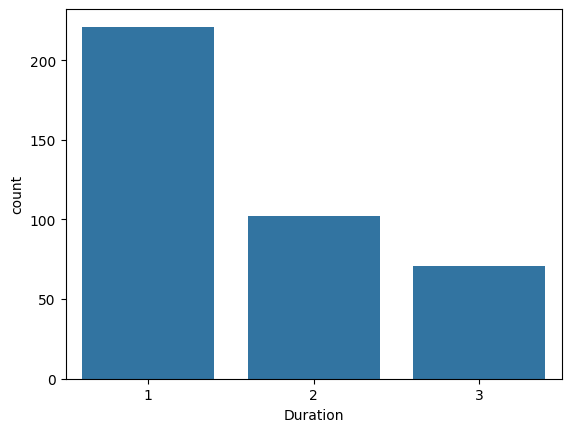

In [13]:
sns.countplot(x=data['Duration'])

<Axes: xlabel='Frequency', ylabel='count'>

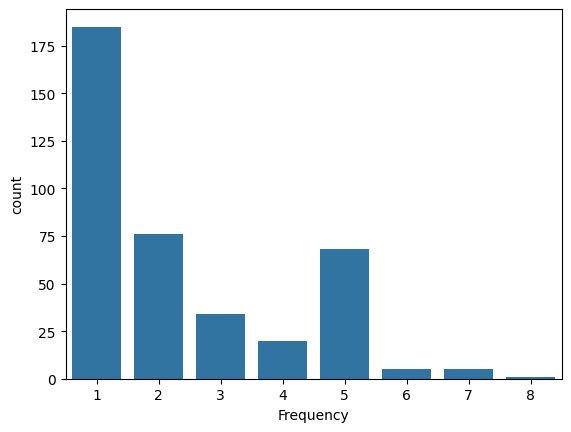

In [14]:
sns.countplot(x=data['Frequency'])

<Axes: xlabel='Intensity', ylabel='count'>

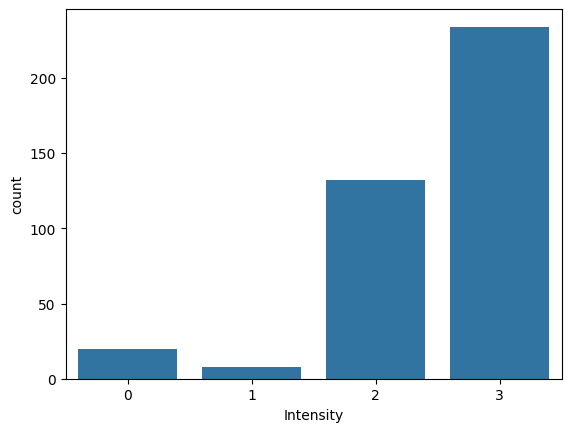

In [15]:
sns.countplot(x=data['Intensity'])

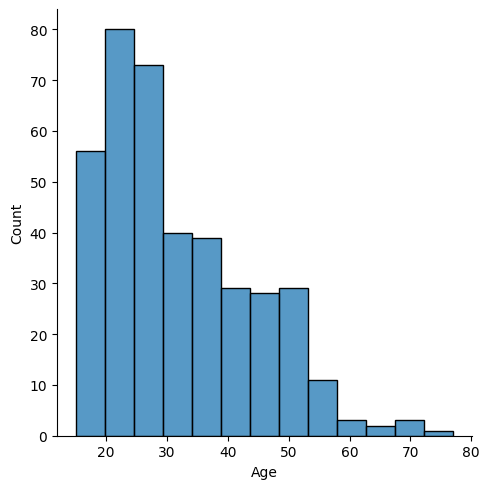

In [16]:
sns.displot(data['Age'])

In [17]:
data['Type'].value_counts()

Type
Typical aura with migraine       241
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: count, dtype: int64

In [18]:
data['Type'].describe()

count                            394
unique                             7
top       Typical aura with migraine
freq                             241
Name: Type, dtype: object

<Axes: xlabel='count', ylabel='Type'>

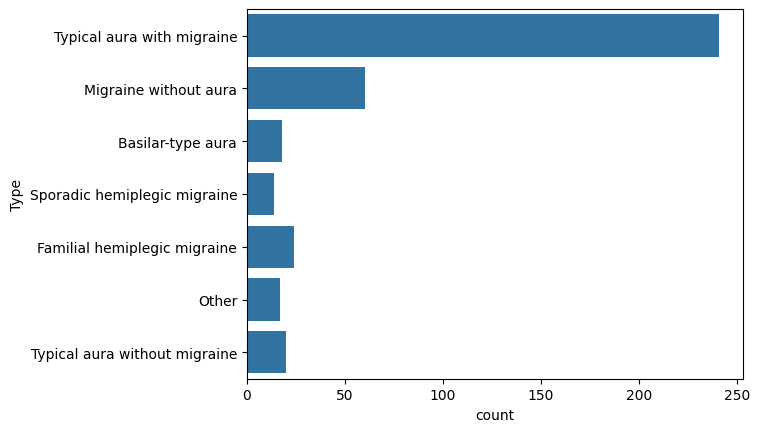

In [19]:
sns.countplot(y=data['Type'])

# Bivariate Analysis

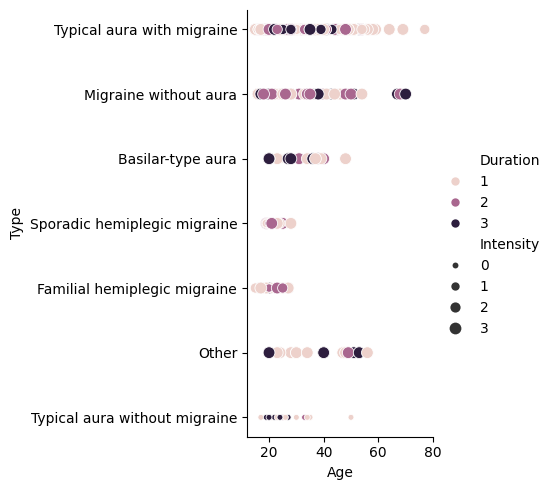

In [20]:
sns.relplot(x='Age',y='Type',kind='scatter',data=data,size='Intensity',hue='Duration')

<Axes: xlabel='Age', ylabel='Type'>

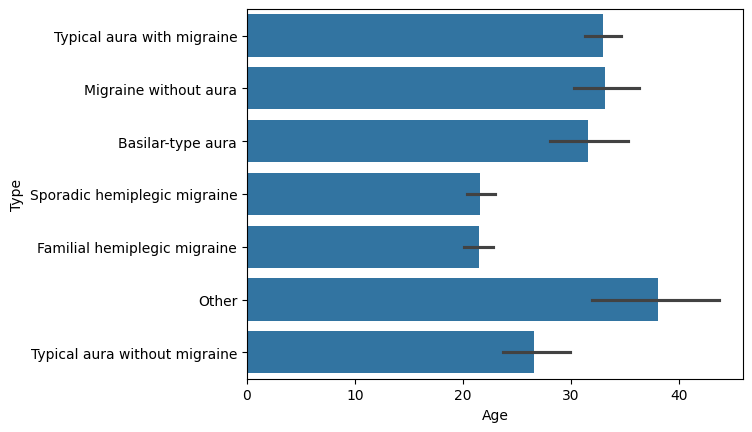

In [21]:
sns.barplot(y=data['Type'],x=data['Age'])

<Axes: xlabel='Frequency', ylabel='Type'>

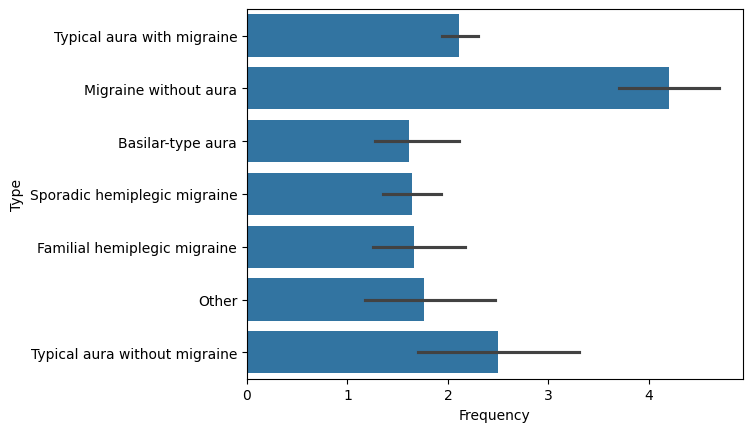

In [22]:
sns.barplot(y=data['Type'],x=data['Frequency'])

In [23]:
col = data.columns
col

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

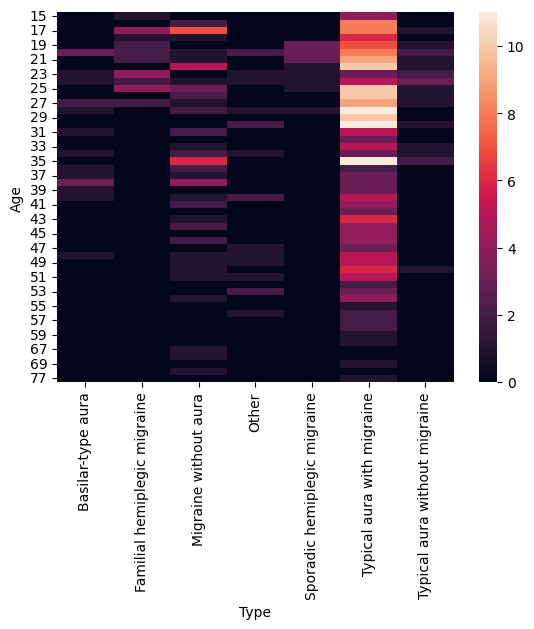

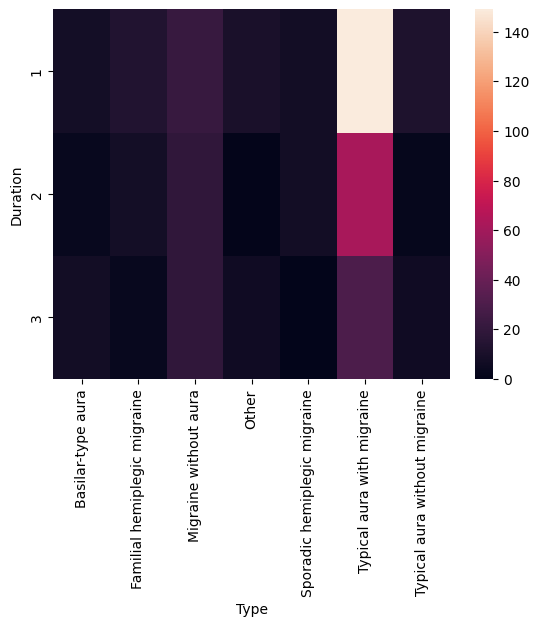

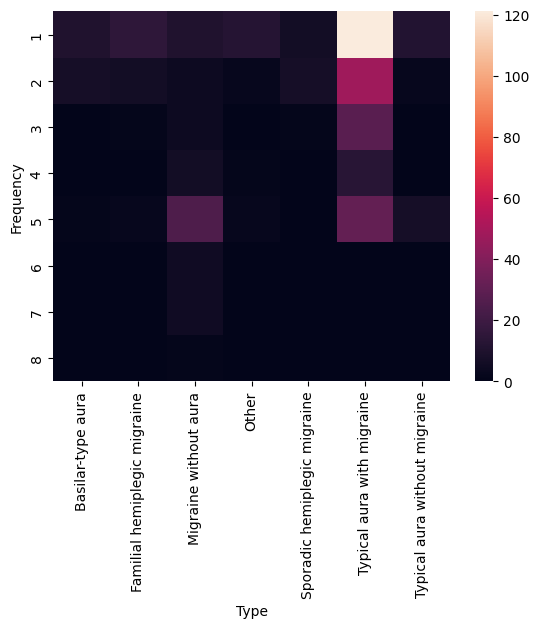

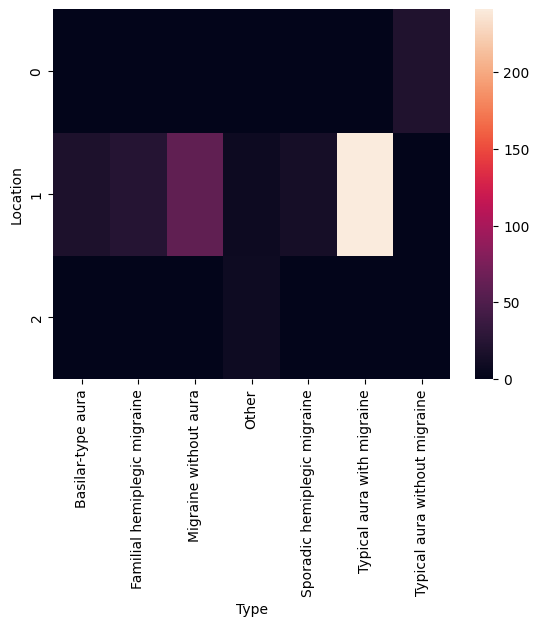

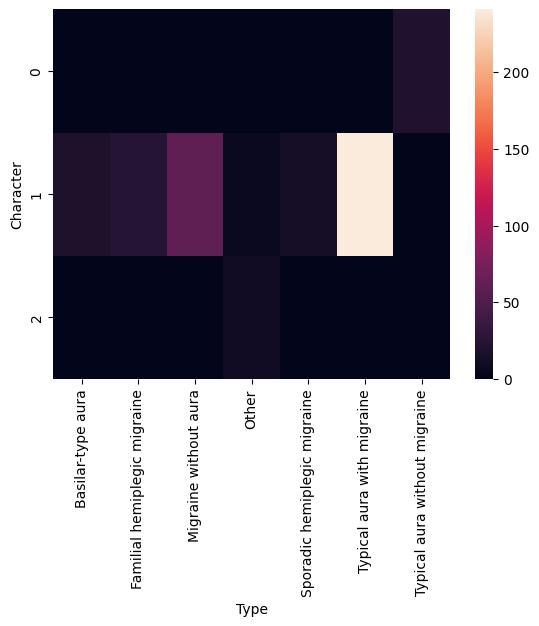

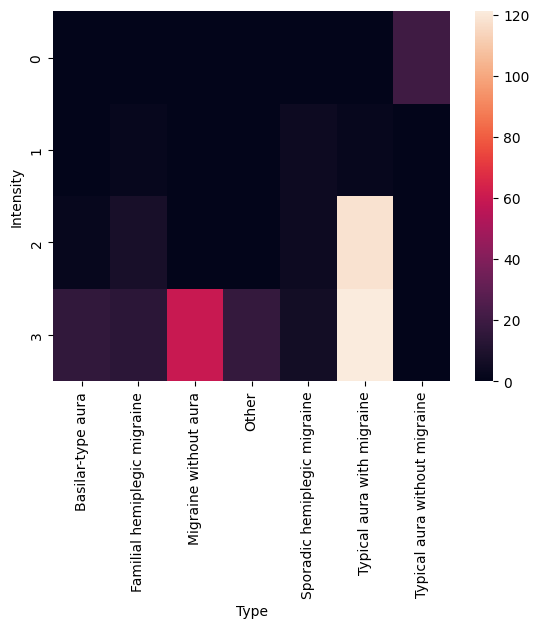

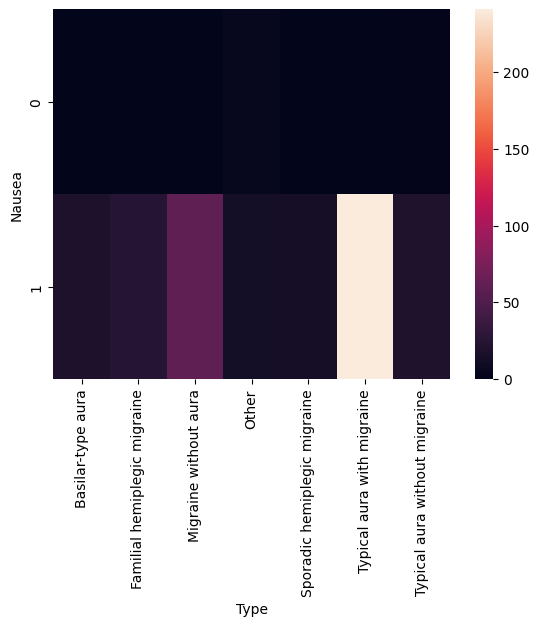

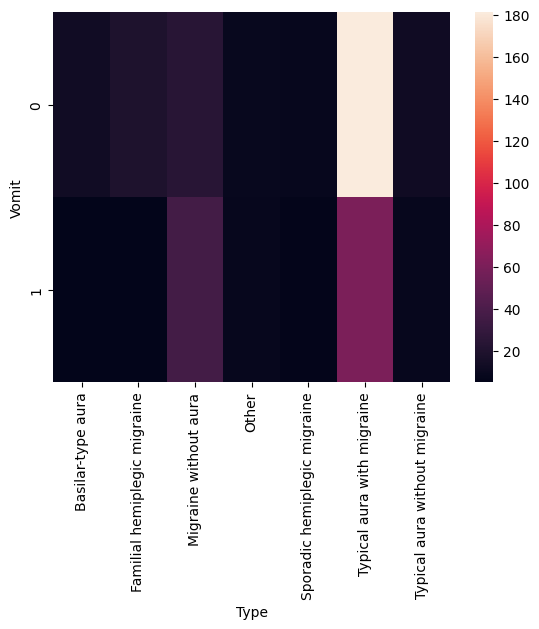

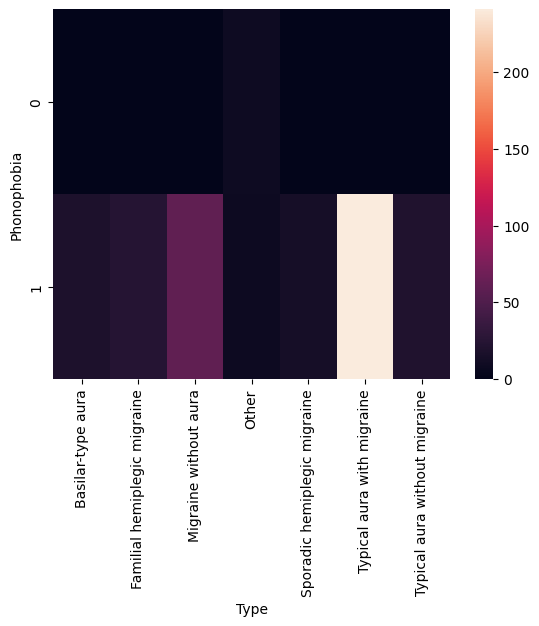

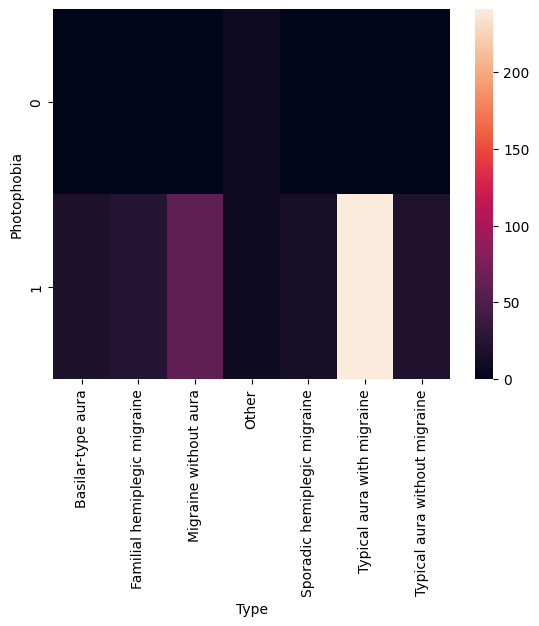

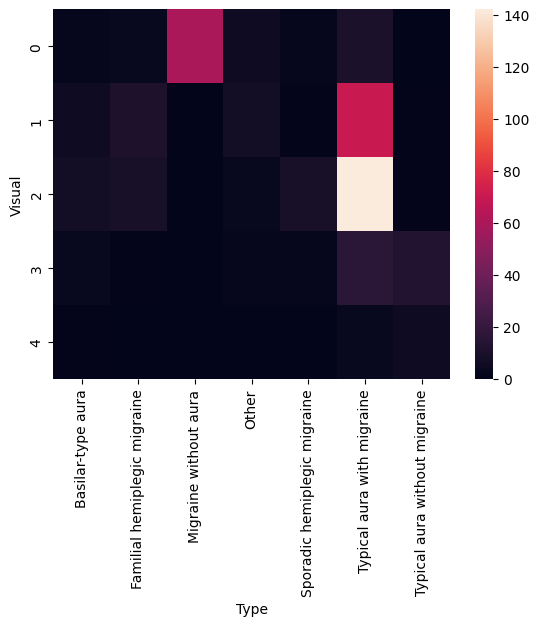

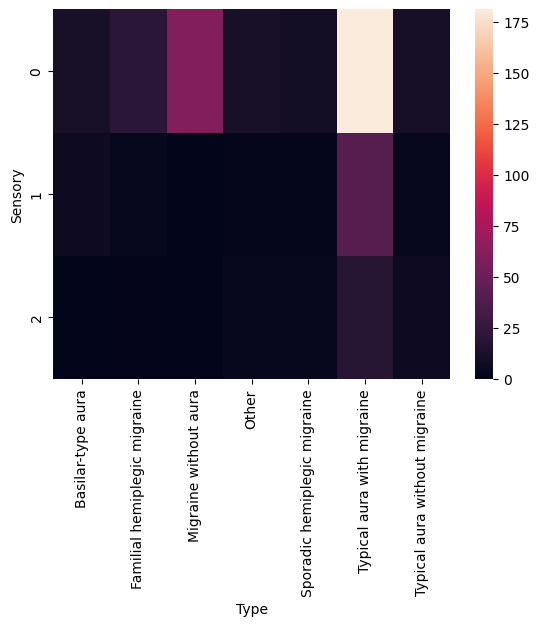

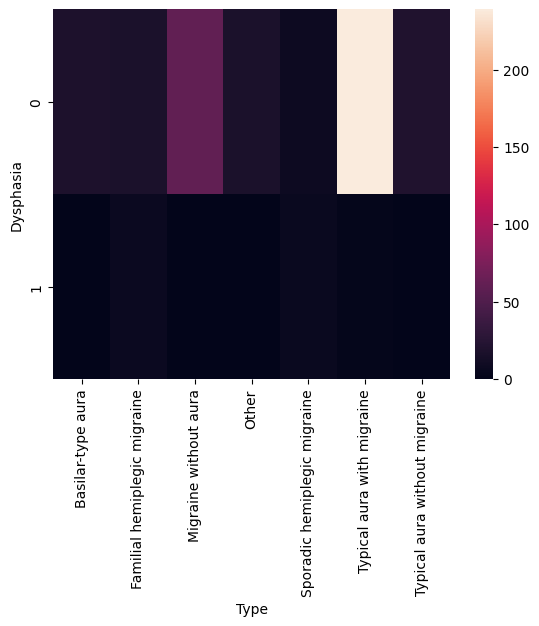

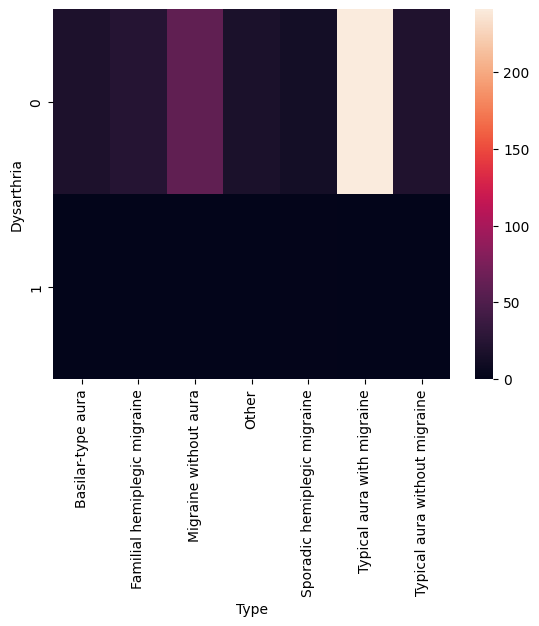

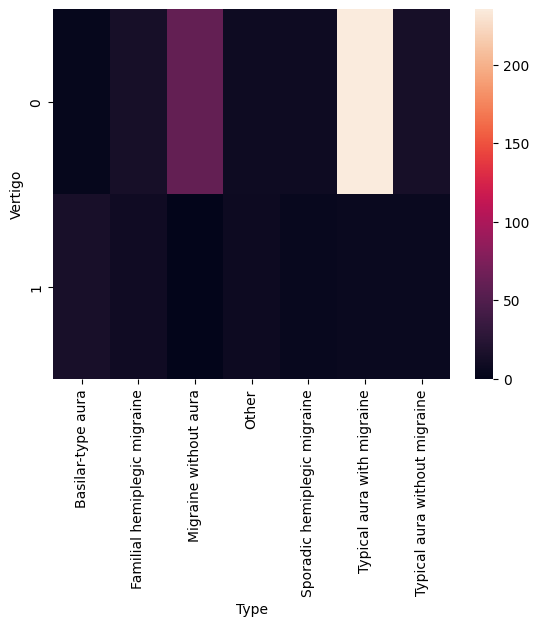

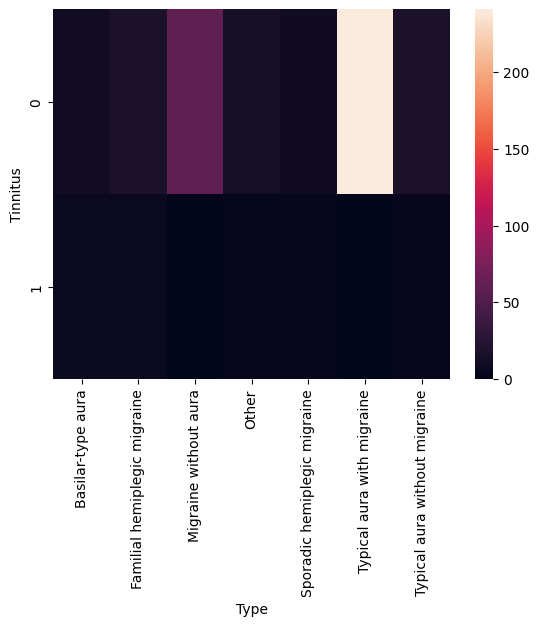

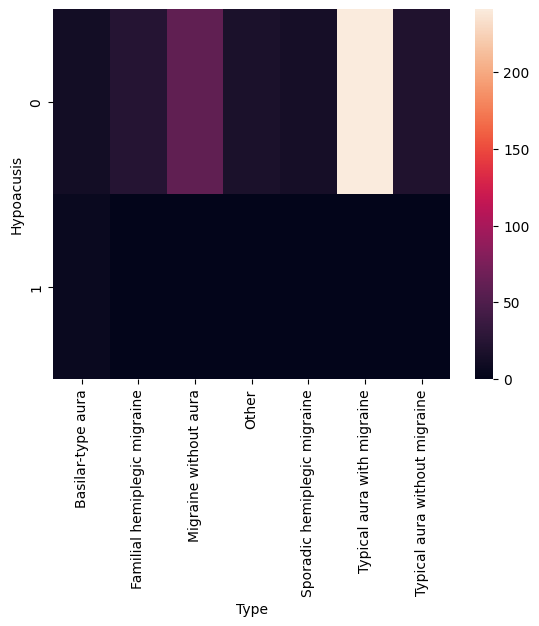

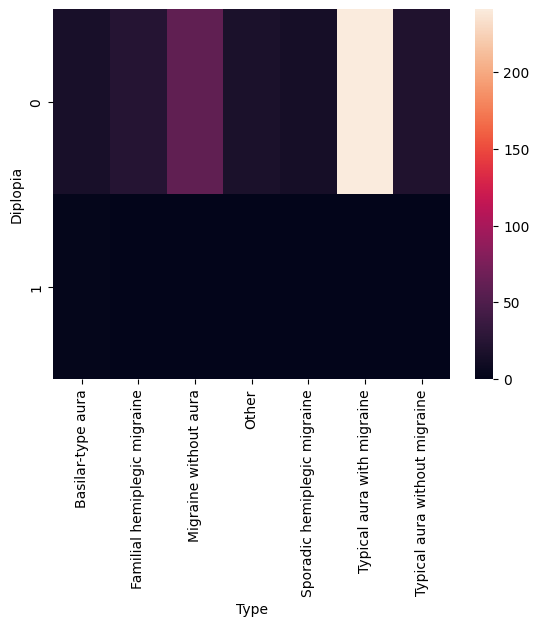

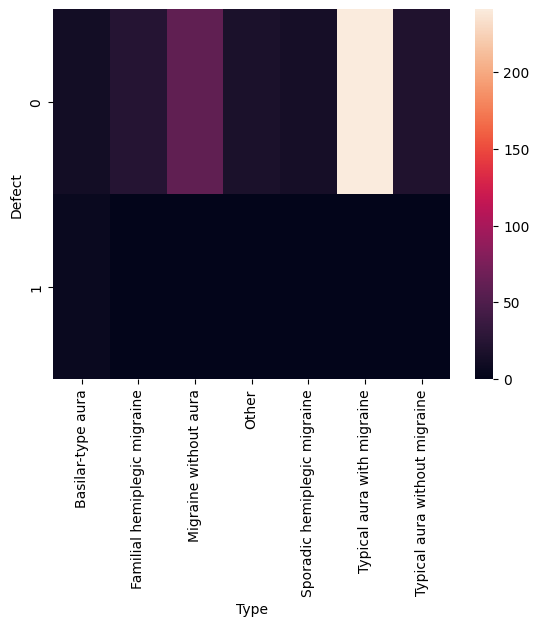

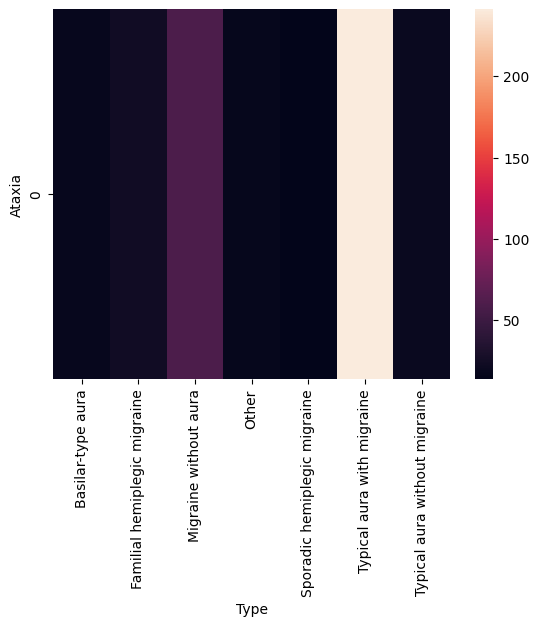

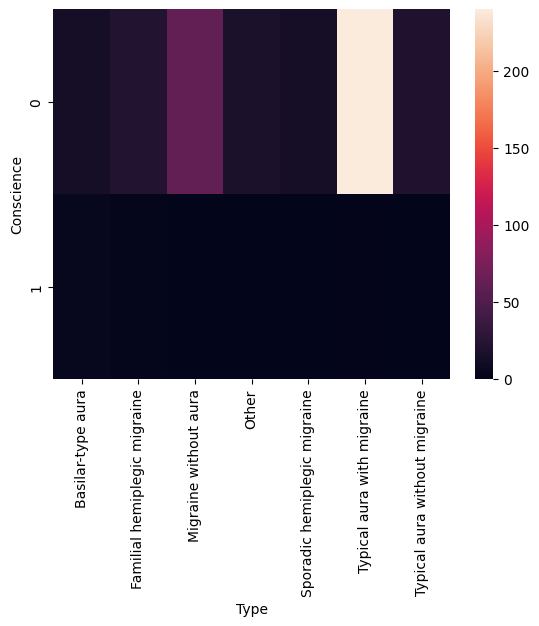

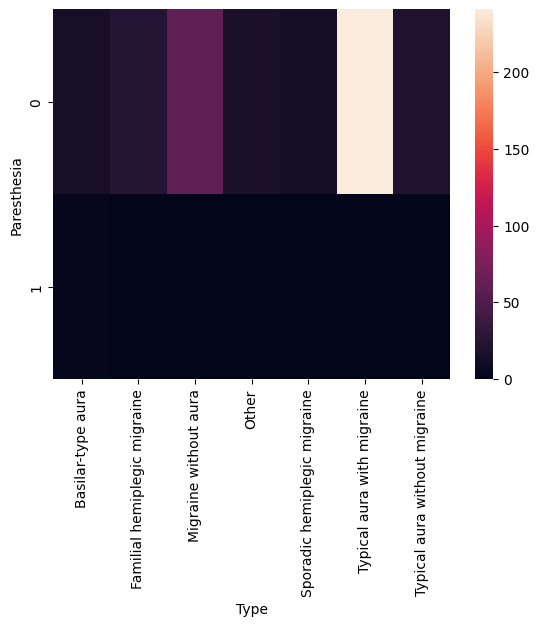

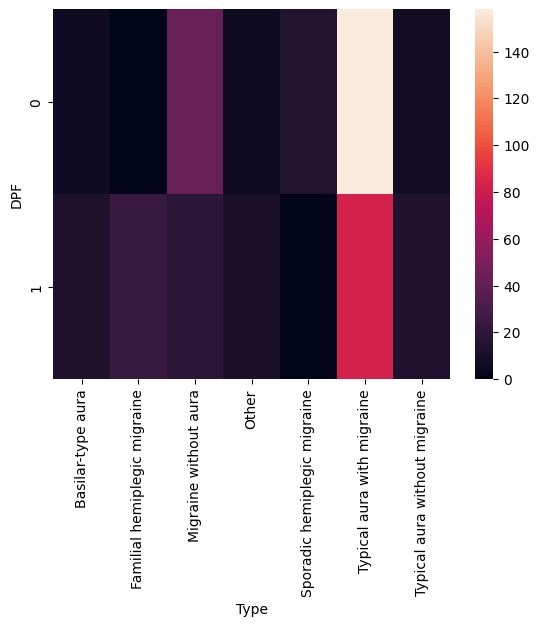

In [24]:
def heatmap_wrt_type():
    for i in col:
        if data[i].dtype =='int64':
            sns.heatmap(pd.crosstab(data[i],data['Type']))
            plt.show()
heatmap_wrt_type()

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


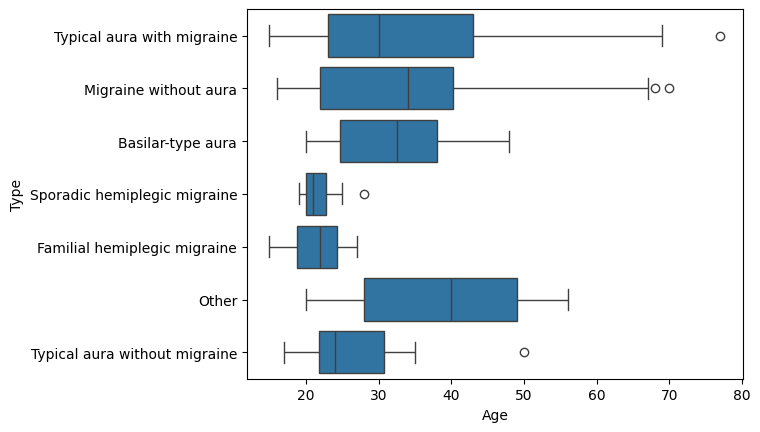

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


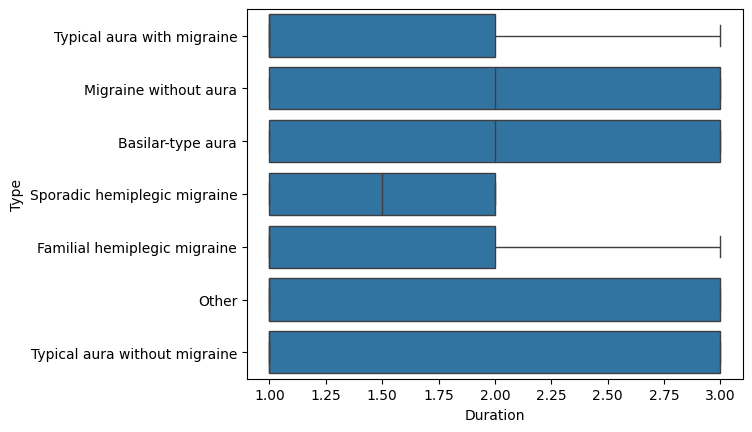

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


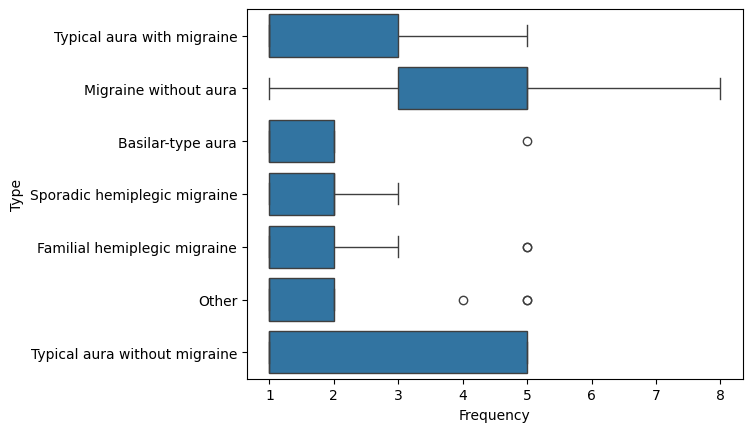

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


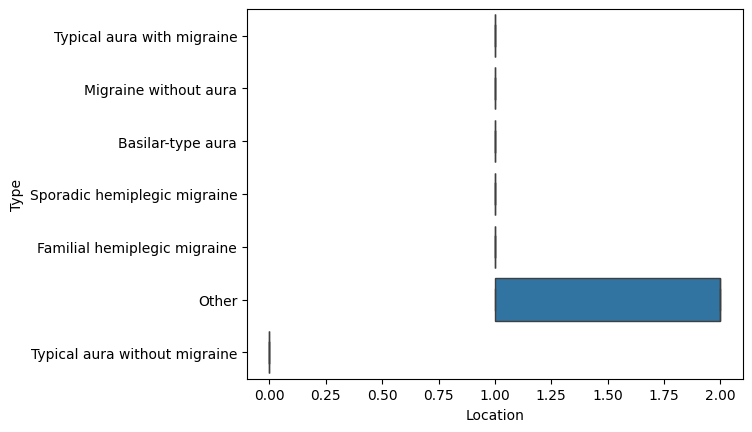

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


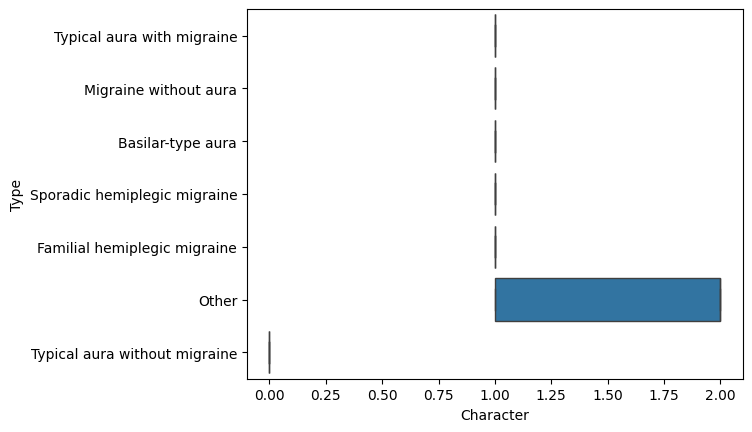

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


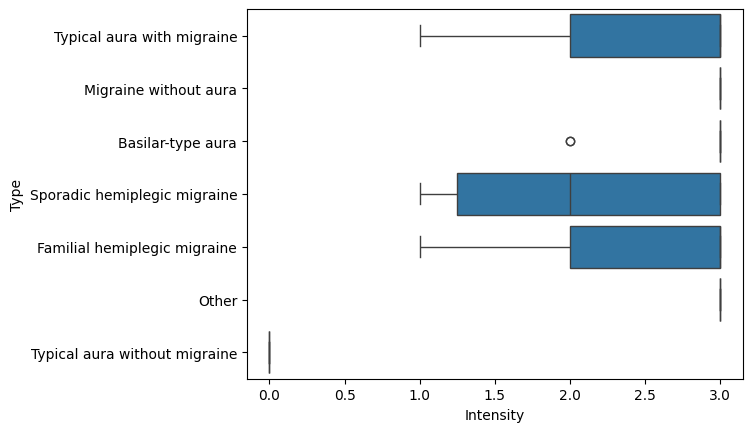

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


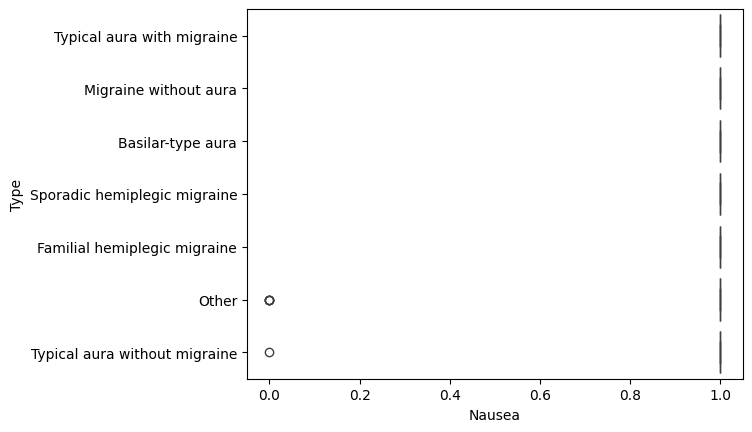

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


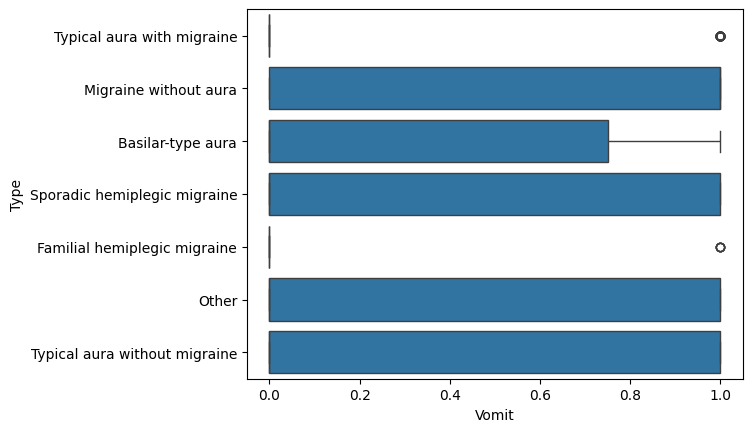

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


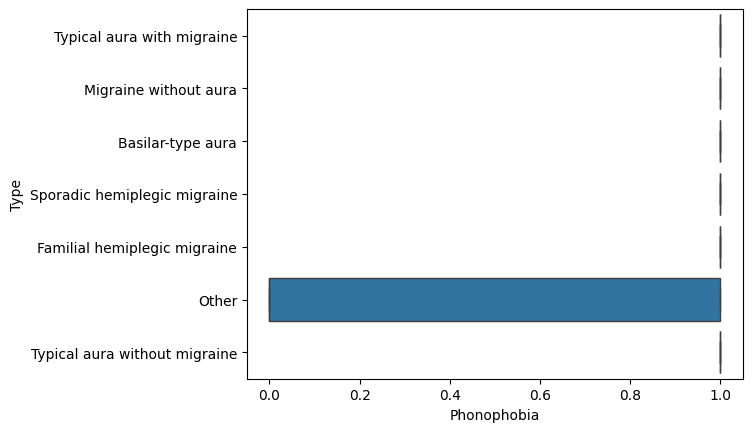

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


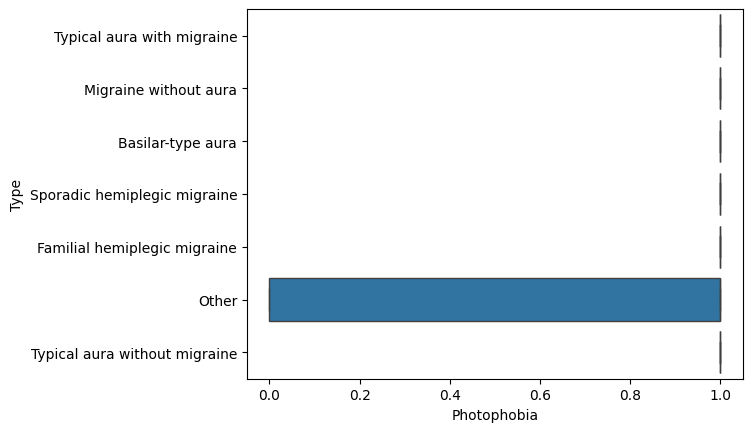

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


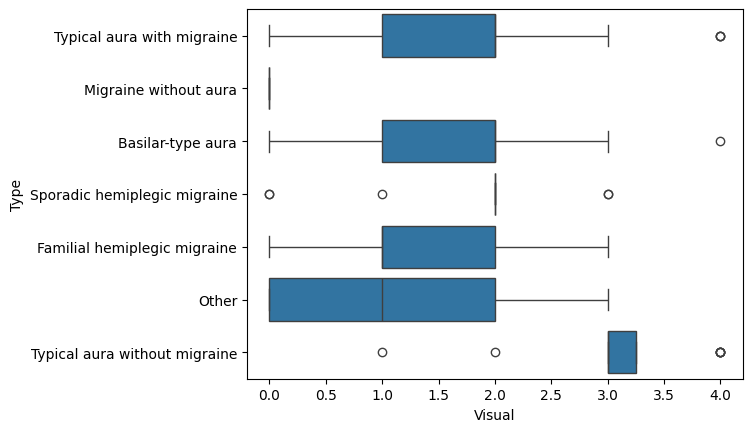

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


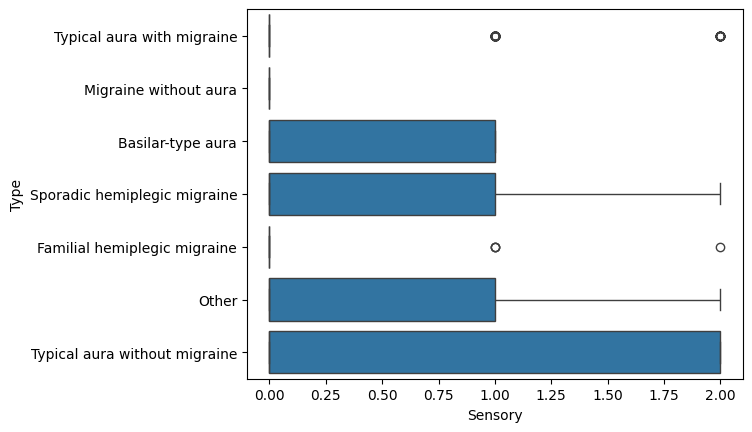

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


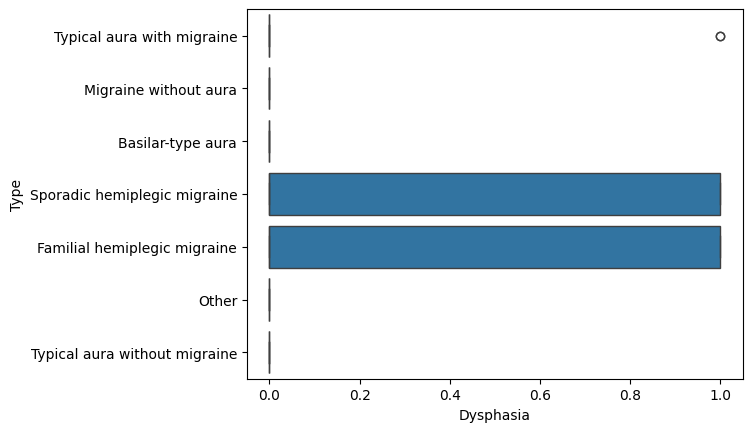

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


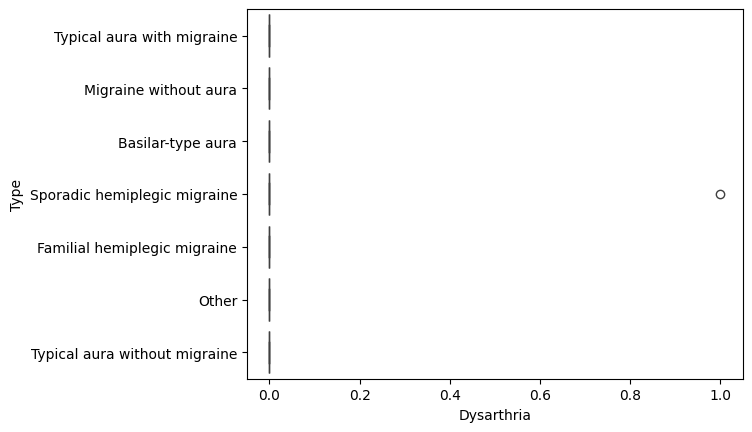

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


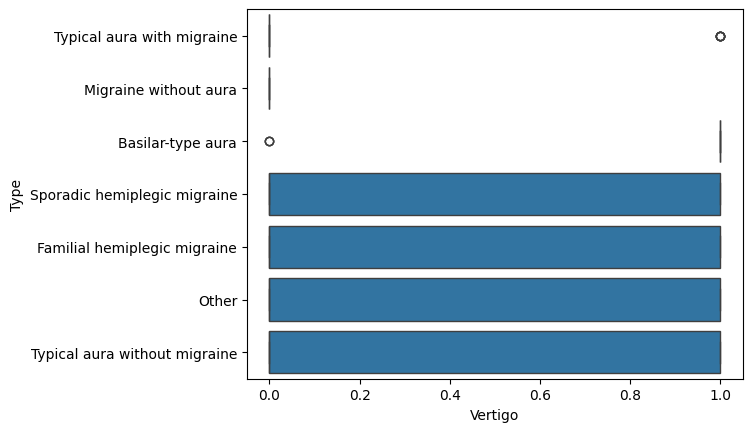

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


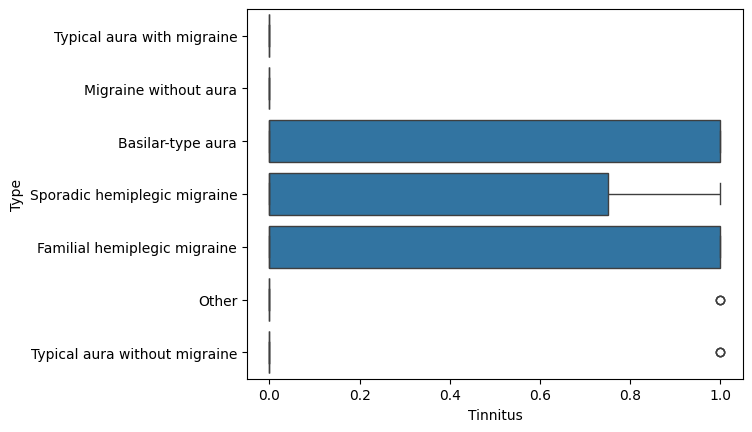

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


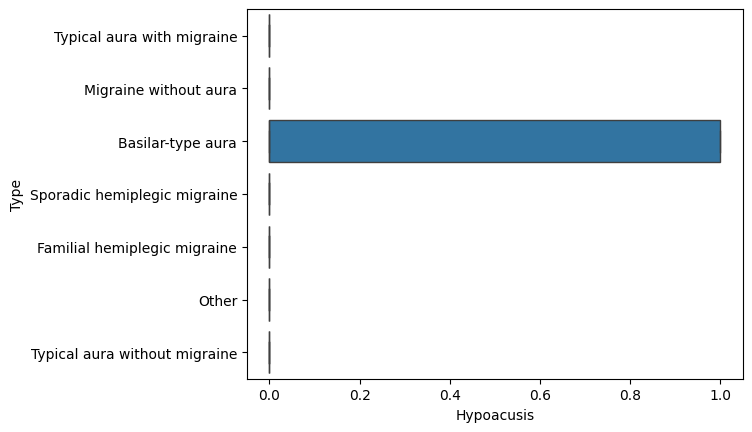

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


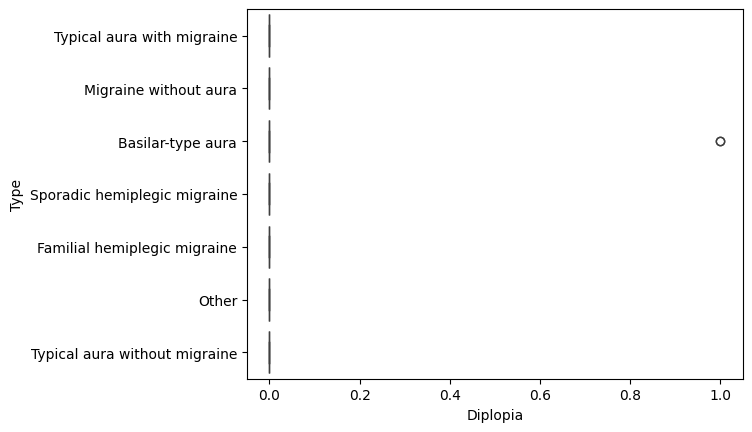

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


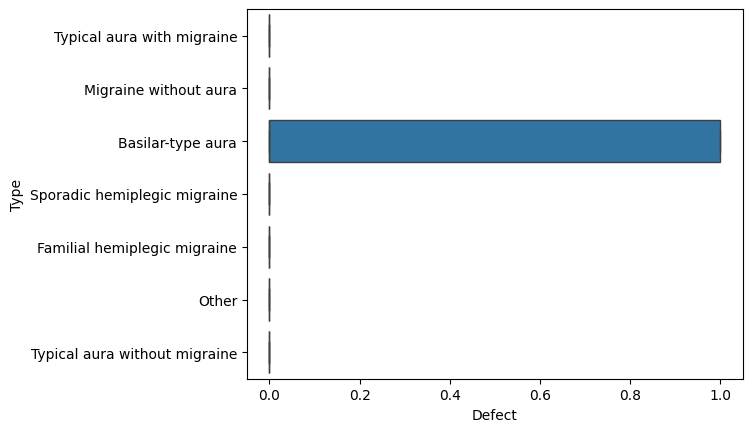

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


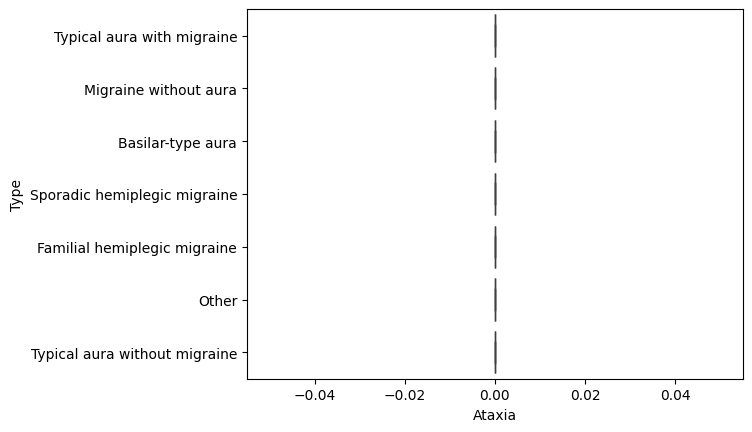

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


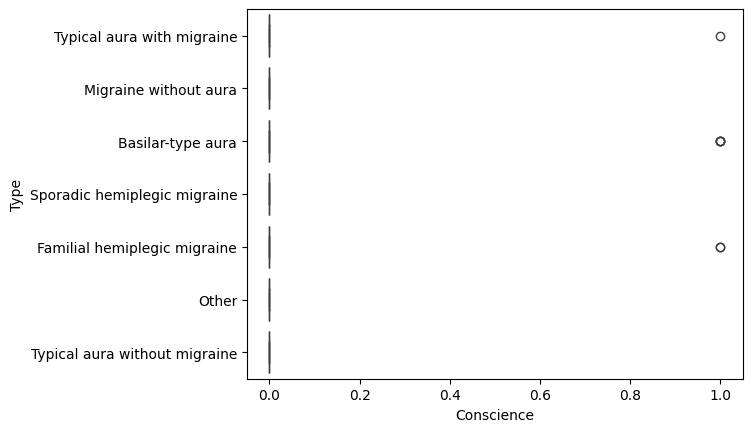

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


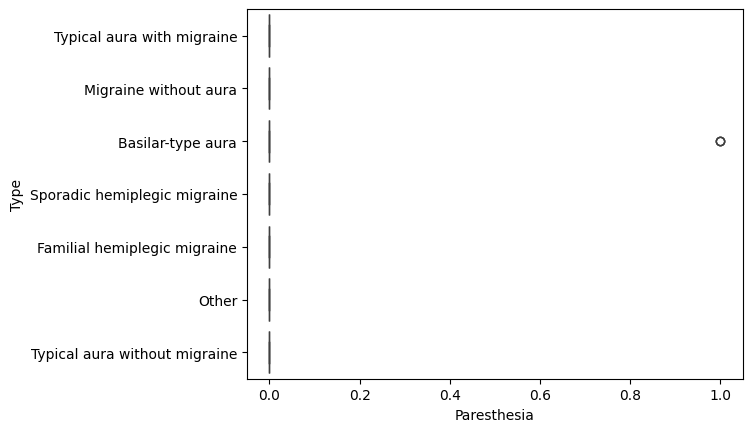

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


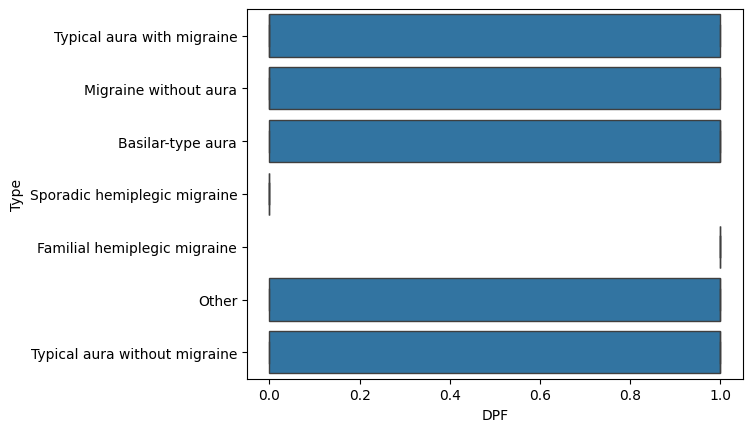

In [25]:
def boxplot_wrt_type():
    for i in col:
        if data[i].dtype =='int64':
            sns.boxplot(x=data[i],y=data['Type'])
            plt.show()
boxplot_wrt_type()

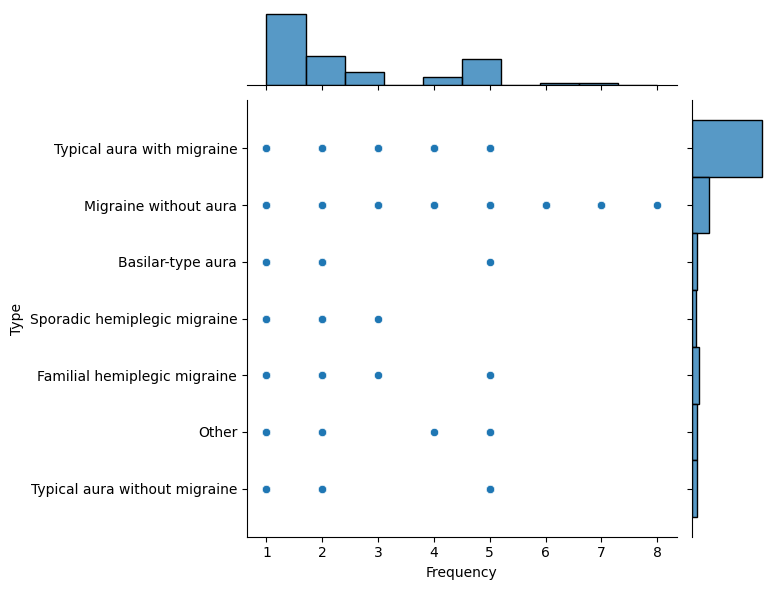

In [26]:
sns.jointplot(x='Frequency', y='Type', data=data)

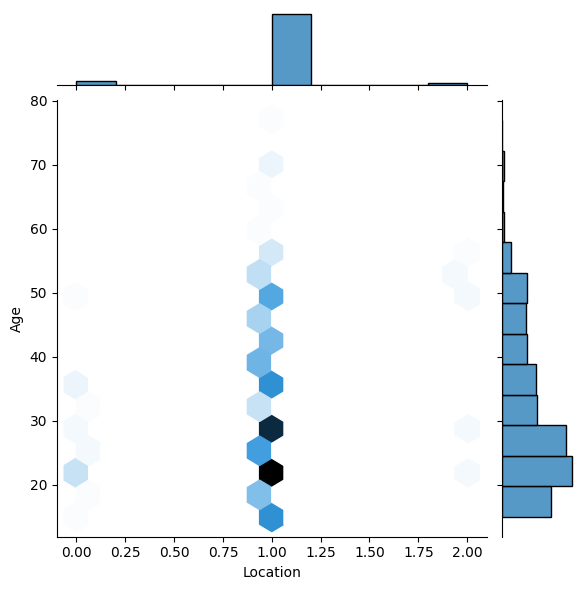

In [27]:
sns.jointplot(x='Location', y='Age', kind='hex',data=data)

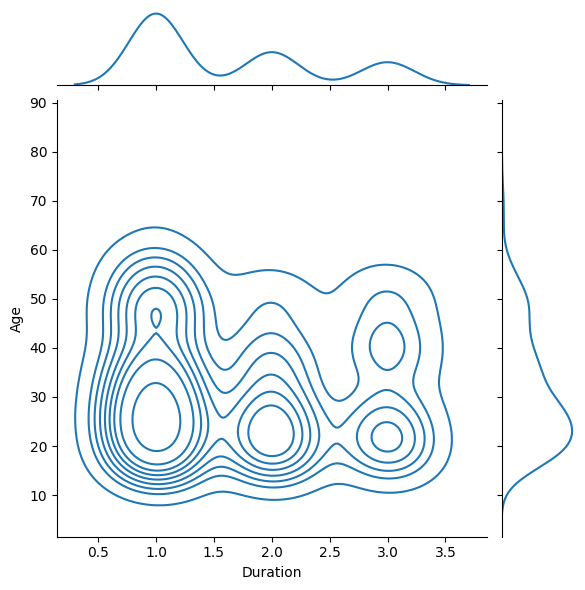

In [28]:
sns.jointplot(x='Duration', y='Age', kind='kde',data=data)

# Prediction System

# Data Splitting

In [29]:
X_t = data.drop('Type', axis=1)
X_t
y_t = data[['Type']]
y_t

,Type
0,Typical aura with migraine
1,Typical aura with migraine
2,Typical aura with migraine
3,Typical aura with migraine
4,Typical aura with migraine
...,...
395,Basilar-type aura
396,Basilar-type aura
397,Basilar-type aura
398,Basilar-type aura


In [30]:
X = data.iloc[:,:-1]
X

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
396,20,3,2,1,1,3,1,0,1,1,...,0,0,1,1,0,0,0,0,0,1
397,28,3,2,1,1,3,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
398,20,3,1,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,1,1


In [31]:
y = data.iloc[:,-1:]
y

,Type
0,Typical aura with migraine
1,Typical aura with migraine
2,Typical aura with migraine
3,Typical aura with migraine
4,Typical aura with migraine
...,...
395,Basilar-type aura
396,Basilar-type aura
397,Basilar-type aura
398,Basilar-type aura


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Creation

In [33]:
rf = RandomForestClassifier()

In [34]:
rf.fit(X_train,y_train)

c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [35]:
y_pred = rf.predict(X_test)
y_pred[27]


'Migraine without aura'

# Model Evaluation

In [36]:
acc_score = accuracy_score(y_test,y_pred)

print("Accuracy :",acc_score)

Accuracy : 0.9240506329113924


In [37]:
print(classification_report(y_test,y_pred))

                               precision    recall  f1-score   support

            Basilar-type aura       0.60      1.00      0.75         3
 Familial hemiplegic migraine       0.00      0.00      0.00         2
        Migraine without aura       0.93      1.00      0.97        14
                        Other       1.00      0.40      0.57         5
 Sporadic hemiplegic migraine       0.50      0.50      0.50         2
   Typical aura with migraine       0.96      1.00      0.98        48
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.92        79
                    macro avg       0.71      0.70      0.68        79
                 weighted avg       0.91      0.92      0.91        79



c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Model Testing

In [38]:
data.iloc[34]

Age                               22
Duration                           2
Frequency                          3
Location                           1
Character                          1
Intensity                          3
Nausea                             1
Vomit                              1
Phonophobia                        1
Photophobia                        1
Visual                             0
Sensory                            0
Dysphasia                          0
Dysarthria                         0
Vertigo                            0
Tinnitus                           0
Hypoacusis                         0
Diplopia                           0
Defect                             0
Ataxia                             0
Conscience                         0
Paresthesia                        0
DPF                                1
Type           Migraine without aura
Name: 34, dtype: object

In [39]:
input_data = (22,2,3,1,1,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)

print("You have",prediction[0])

You have Migraine without aura


c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [40]:
data.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

# Saving the model

In [41]:
import pickle

In [42]:
filename = 'migraine_trained_model.sav'
pickle.dump(rf,open(filename,'wb'))

In [43]:
loaded_model = pickle.load(open('migraine_trained_model.sav','rb'))

In [44]:
input_data = (22,2,3,1,1,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print("You have",prediction[0])

You have Migraine without aura


c:\Users\kosur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
